<a href="https://colab.research.google.com/github/pspvv/ML_Workshop/blob/main/Stroke_Prediction_Classification_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Models: Stroke Prediction Dataset
This notebook builds multiple classification models to predict the likelihood of a stroke based on demographic, health, and lifestyle data.

### Steps:
1. Load and explore the dataset.
2. Clean and preprocess the data.
3. Train the following classification models:
   - Logistic Regression
   - Naïve Bayes
   - KNN
   - Decision Tree
   - Support Vector Classifier
4. Evaluate models using metrics: Accuracy, Precision, Recall, and F1-Score.

In [70]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Load the Dataset

In [9]:
# Load the Stroke Prediction dataset
file_path = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)

## Exploring the Dataset

In [10]:
# Display dataset information
print("Dataset Shape:", df.shape)

Dataset Shape: (5110, 12)


In [12]:
# Display the first 5 rows of the dataset
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [13]:
# Display dataset information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data Cleaning and Preprocessing

In [14]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [15]:
## Handling Missing Values
# Fill missing values in 'bmi' with the median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [16]:
# Verify no missing values remain
print("Missing Values After Imputation:")
print(df.isnull().sum())

Missing Values After Imputation:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## Dropping Irrelevant Columns


In [17]:
# Drop the 'id' column
df = df.drop(['id'], axis=1)

In [18]:
# Display dataset after dropping the column
print("Dataset Columns After Dropping Irrelevant Columns:")
print(df.columns)

Dataset Columns After Dropping Irrelevant Columns:
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


## Encoding Categorical Variables


In [19]:
# Identify categorical columns to encode
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [20]:
# Performing encoding on the categorical columns
df = pd.get_dummies(df, columns=categorical_cols)

In [21]:
# Display dataset after encoding
print("Dataset After Encoding Categorical Variables:")
print(df.head())

Dataset After Encoding Categorical Variables:
    age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6       1   
1  61.0             0              0             202.21  28.1       1   
2  80.0             0              1             105.92  32.5       1   
3  49.0             0              0             171.23  34.4       1   
4  79.0             1              0             174.12  24.0       1   

   gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0          False         True         False            False  ...   
1           True        False         False            False  ...   
2          False         True         False            False  ...   
3           True        False         False            False  ...   
4           True        False         False            False  ...   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False  

## Splitting Features and Target


In [29]:
# Separate features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

In [25]:
# Display feature and target shapes
print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

Features Shape: (5110, 21)
Target Shape: (5110,)


In [32]:
# Fit and transform the features
X = scaler.fit_transform(X)

In [33]:
# Display a preview of the normalized features
print("Features After Normalization:")
print(X[:5])

Features After Normalization:
[[ 1.05143428 -0.32860186  4.18503199  2.70637544  1.00508597 -1.18950991
   1.18998977 -0.01399046 -0.72388421  0.72388421 -0.38411064 -0.06575636
   0.86429656 -0.43688053 -0.39411222 -0.98407974  0.98407974 -0.65801073
   2.1849511  -0.7667743  -0.42731326]
 [ 0.78607007 -0.32860186 -0.2389468   2.12155854 -0.09898092  0.84068236
  -0.84034336 -0.01399046 -0.72388421  0.72388421 -0.38411064 -0.06575636
  -1.15701027  2.28895527 -0.39411222  1.01617781 -1.01617781 -0.65801073
  -0.45767615  1.30416474 -0.42731326]
 [ 1.62639008 -0.32860186  4.18503199 -0.0050283   0.47253605 -1.18950991
   1.18998977 -0.01399046 -0.72388421  0.72388421 -0.38411064 -0.06575636
   0.86429656 -0.43688053 -0.39411222  1.01617781 -1.01617781 -0.65801073
  -0.45767615  1.30416474 -0.42731326]
 [ 0.25534165 -0.32860186 -0.2389468   1.4373581   0.71932748  0.84068236
  -0.84034336 -0.01399046 -0.72388421  0.72388421 -0.38411064 -0.06575636
   0.86429656 -0.43688053 -0.39411222 -

## Splitting the Data into Train and Test Sets


In [34]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Display shapes of the training and testing sets
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (3577, 21)
Testing Set Shape: (1533, 21)


## Initializing Classification Models

In [36]:
lr = LogisticRegression(random_state=42)
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
svc = SVC(random_state=42, kernel='linear')

## Training and Evaluating Models


In [116]:
# Initialize an empty list to store results
results = []

In [117]:
# Train the model using Linear Regression model
lr.fit(X_train, y_train)
# Make predictions
y_pred_lr = lr.predict(X_test)
# Calculate evaluation metrics
results.append({
    "Model": "Linear Regression",
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr, zero_division=0),
    "Recall": recall_score(y_test, y_pred_lr, zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_lr, zero_division=0)
})
print("Linear Regression")
print("Classification report\n",classification_report(y_test, y_pred_lr))
print("Confusion matrix\n",confusion_matrix(y_test, y_pred_lr))
print("No. of classes",lr.classes_)
print("Weights",lr.coef_)
print("Probability",lr.predict_proba(X_test))
print("Score",lr.score(X_test, y_test))

Linear Regression
Classification report
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       1.00      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.94      0.92      1533

Confusion matrix
 [[1444    0]
 [  88    1]]
No. of classes [0 1]
Weights [[ 1.70946036  0.11487059  0.06883888  0.19650122 -0.00843446  0.01133386
  -0.01264795  0.04624358  0.08431916 -0.08431916 -0.06864439 -0.09691884
  -0.0309015  -0.19262211  0.33792648 -0.02509006  0.02509006  0.02122826
  -0.03698259 -0.05747228  0.08855666]]
Probability [[0.9957137  0.0042863 ]
 [0.99499239 0.00500761]
 [0.99584853 0.00415147]
 ...
 [0.99000204 0.00999796]
 [0.96468215 0.03531785]
 [0.96351604 0.03648396]]
Score 0.9425962165688193


In [118]:
# Train the model using Naive Bayes model
nb.fit(X_train, y_train)
# Make predictions
y_pred_nb = nb.predict(X_test)
# Calculate evaluation metrics
results.append({
    "Model": "Naive Bayes model",
    "Accuracy": accuracy_score(y_test, y_pred_nb),
    "Precision": precision_score(y_test, y_pred_nb, zero_division=0),
    "Recall": recall_score(y_test, y_pred_nb, zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_nb, zero_division=0)
})
print("Naive Bayes model")
print("Classification report\n",classification_report(y_test, y_pred_nb))
print("Confusion matrix\n",confusion_matrix(y_test, y_pred_nb))
print("Score",nb.score(X_test,y_test))
print("Probability",nb.predict_proba(X_test))

Naive Bayes model
Classification report
               precision    recall  f1-score   support

           0       1.00      0.29      0.45      1444
           1       0.08      1.00      0.15        89

    accuracy                           0.33      1533
   macro avg       0.54      0.65      0.30      1533
weighted avg       0.95      0.33      0.43      1533

Confusion matrix
 [[ 422 1022]
 [   0   89]]
Score 0.3333333333333333
Probability [[6.46452692e-01 3.53547308e-01]
 [1.05622547e-03 9.98943775e-01]
 [1.00000000e+00 1.46643496e-19]
 ...
 [1.23451991e-03 9.98765480e-01]
 [1.39276253e-03 9.98607237e-01]
 [2.03486273e-04 9.99796514e-01]]


In [119]:
# Train the model using KNN Model
knn.fit(X_train, y_train)
# Make predictions
y_pred_knn = knn.predict(X_test)
# Calculate evaluation metrics
results.append({
    "Model": "KNN Model",
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn, zero_division=0),
    "Recall": recall_score(y_test, y_pred_knn, zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_knn, zero_division=0)
})
print("KNN Model")
print("Score",knn.score(X_test, y_test))
print("Classification report\n",classification_report(y_test, y_pred_knn))
print("Confusion matrix\n",confusion_matrix(y_test, y_pred_knn))
print("Probability",knn.predict_proba(X_test))

KNN Model
Score 0.9419439008480104
Classification report
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.50      0.03      0.06        89

    accuracy                           0.94      1533
   macro avg       0.72      0.52      0.52      1533
weighted avg       0.92      0.94      0.92      1533

Confusion matrix
 [[1441    3]
 [  86    3]]
Probability [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [120]:
# Train the model using Decision Tree
dt.fit(X_train, y_train)
# Make predictions
y_pred_dt = dt.predict(X_test)
# Calculate evaluation metrics
results.append({
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt, zero_division=0),
    "Recall": recall_score(y_test, y_pred_dt, zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_dt, zero_division=0)
})
print("Decision Tree")
print("Score",dt.score(X_test, y_test))
print("Classification report\n",classification_report(y_test, y_pred_dt))
print("Confusion matrix\n",confusion_matrix(y_test, y_pred_dt))
print("Probability",dt.predict_proba(X_test))

Decision Tree
Score 0.9054142204827136
Classification report
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.17      0.16      0.16        89

    accuracy                           0.91      1533
   macro avg       0.56      0.55      0.56      1533
weighted avg       0.90      0.91      0.90      1533

Confusion matrix
 [[1374   70]
 [  75   14]]
Probability [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [121]:
# Train the model using Support Vector Classifier
svc.fit(X_train, y_train)
# Make predictions
y_pred_svc = svc.predict(X_test)
# Calculate evaluation metrics
results.append({
    "Model": "Support Vector Classifier",
    "Accuracy": accuracy_score(y_test, y_pred_svc),
    "Precision": precision_score(y_test, y_pred_svc, zero_division=0),
    "Recall": recall_score(y_test, y_pred_svc, zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_svc, zero_division=0)
})
print("Support Vector Classifier")
print("Score",svc.score(X_test, y_test))
print("Classification report\n",classification_report(y_test, y_pred_svc,zero_division=0))
print("Confusion matrix\n",confusion_matrix(y_test, y_pred_svc))

Support Vector Classifier
Score 0.9419439008480104
Classification report
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

Confusion matrix
 [[1444    0]
 [  89    0]]


## Summarizing Model Performance

In [122]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

In [123]:
# Display the summary
print("\nSummary of Model Performance:")
print(results_df)


Summary of Model Performance:
                       Model  Accuracy  Precision    Recall  F1-Score
0          Linear Regression  0.942596   1.000000  0.011236  0.022222
1          Naive Bayes model  0.333333   0.080108  1.000000  0.148333
2                  KNN Model  0.941944   0.500000  0.033708  0.063158
3              Decision Tree  0.905414   0.166667  0.157303  0.161850
4  Support Vector Classifier  0.941944   0.000000  0.000000  0.000000


## Visualizing Model Performance

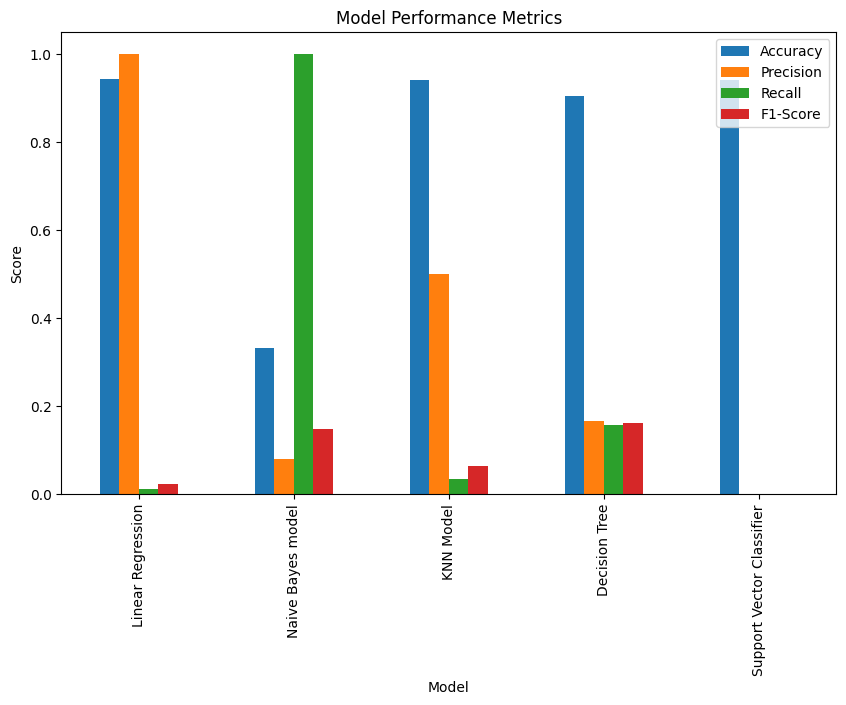

In [124]:
# Plot model performance
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.xlabel("Model")
plt.show()